## 3. DATOS DE IDEALISTA

Tras la nulidad de intentar hacer webscraping en IDEALSITA (unicamente para obtener historico precios €/m2) acudimos a chat gpt con la url para que nos lo transforme a CSV
                                                            

tras varios intentos fallidos, le damos la instruccion a chat gpt que fraccione los CSV en bloques de 4 años. de esta forma conseguimos obtenerlo

In [49]:
# 1. Importa pandas, pyplot y seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import locale

import warnings 
warnings.filterwarnings("ignore")

In [50]:
final_combined_data = pd.read_csv("data/housing_prices_IDEALISTA.csv", sep= ",")
final_combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Mes                   363 non-null    object
 1   Precio m2             363 non-null    object
 2   Variación mensual     363 non-null    object
 3   Variación trimestral  363 non-null    object
 4   Variación anual       363 non-null    object
dtypes: object(5)
memory usage: 14.3+ KB


In [51]:
final_combined_data

,Mes,Precio m2,Variación mensual,Variación trimestral,Variación anual
0,Marzo 2024,2.079 €/m2,"1,1 %","1,8 %","7,0 %"
1,Febrero 2024,2.056 €/m2,"0,4 %","1,5 %","7,2 %"
2,Enero 2024,2.049 €/m2,"0,4 %","1,6 %","8,2 %"
3,Enero 2022,1.807 €/m2,"-0,1 %","0,3 %","2,7 %"
4,Febrero 2022,1.801 €/m2,"-0,4 %","-0,5 %","2,8 %"
...,...,...,...,...,...
358,Agosto 2007,2.217 €/m2,"0,1 %","0,1 %","0,2 %"
359,Septiembre 2007,2.218 €/m2,"0,0 %","-0,1 %","0,0 %"
360,Octubre 2007,2.218 €/m2,"0,0 %","-0,2 %","-0,2 %"
361,Noviembre 2007,2.218 €/m2,"0,0 %","-0,5 %","-0,4 %"


In [52]:
final_combined_data["Precio m2"] = final_combined_data["Precio m2"].str.replace(" €/m2", "").str.replace(".", "").astype(int)
final_combined_data.rename(columns={"Precio m2": "Precio €/m2"}, inplace=True)

variations = ["Variación mensual", "Variación trimestral", "Variación anual"]
for col in variations:
    final_combined_data[col] = final_combined_data[col].str.replace(" %", "").str.replace(",", "").astype(float)
    final_combined_data.rename(columns={col: f"{col} (%)"}, inplace=True)

final_combined_data



,Mes,Precio €/m2,Variación mensual (%),Variación trimestral (%),Variación anual (%)
0,Marzo 2024,2079,11.0,18.0,70.0
1,Febrero 2024,2056,4.0,15.0,72.0
2,Enero 2024,2049,4.0,16.0,82.0
3,Enero 2022,1807,-1.0,3.0,27.0
4,Febrero 2022,1801,-4.0,-5.0,28.0
...,...,...,...,...,...
358,Agosto 2007,2217,1.0,1.0,2.0
359,Septiembre 2007,2218,0.0,-1.0,0.0
360,Octubre 2007,2218,0.0,-2.0,-2.0
361,Noviembre 2007,2218,0.0,-5.0,-4.0


In [53]:
housing_price = final_combined_data
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mes                       363 non-null    object 
 1   Precio €/m2               363 non-null    int64  
 2   Variación mensual (%)     363 non-null    float64
 3   Variación trimestral (%)  363 non-null    float64
 4   Variación anual (%)       363 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.3+ KB


In [54]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [55]:
housing_price["Mes"] = pd.to_datetime(housing_price["Mes"], format="%B %Y")
housing_price = housing_price.sort_values(by='Mes', ascending=True)
housing_price



,Mes,Precio €/m2,Variación mensual (%),Variación trimestral (%),Variación anual (%)
351,2007-01-01,2195,5.0,14.0,21.0
195,2007-01-01,2195,5.0,14.0,21.0
352,2007-02-01,2199,2.0,9.0,18.0
196,2007-02-01,2199,2.0,9.0,18.0
353,2007-03-01,2203,2.0,9.0,15.0
...,...,...,...,...,...
25,2023-11-01,2027,6.0,12.0,70.0
26,2023-12-01,2042,7.0,17.0,81.0
2,2024-01-01,2049,4.0,16.0,82.0
1,2024-02-01,2056,4.0,15.0,72.0


In [56]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 351 to 0
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mes                       363 non-null    datetime64[ns]
 1   Precio €/m2               363 non-null    int64         
 2   Variación mensual (%)     363 non-null    float64       
 3   Variación trimestral (%)  363 non-null    float64       
 4   Variación anual (%)       363 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 17.0 KB


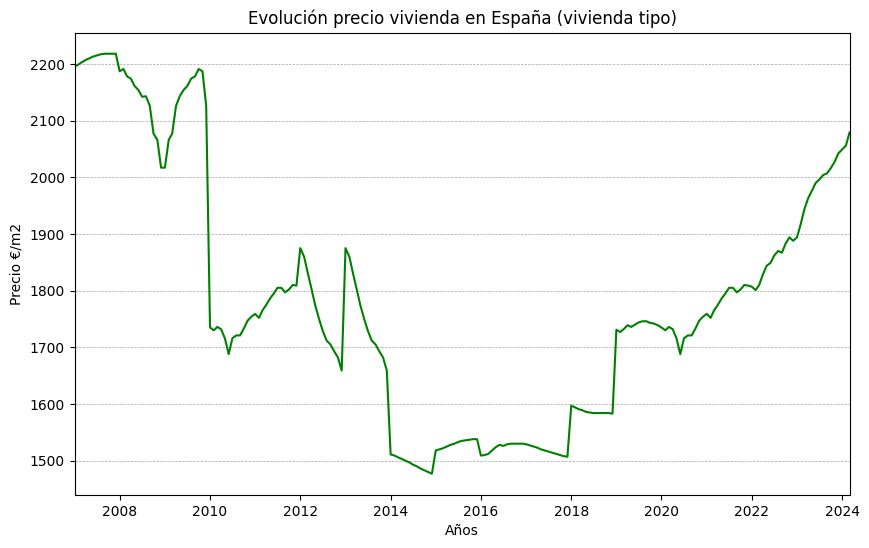

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(housing_price['Mes'], housing_price['Precio €/m2'], label='Precio', color='green')

plt.title('Evolución precio vivienda en España (vivienda tipo)')
plt.xlabel('Años')
plt.ylabel('Precio €/m2')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Aplicar DateFormatter para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Para mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().autoscale(axis='x', tight=True)

# Guardar la figura con las configuraciones adecuadas
plt.savefig("2.2.Idealista.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

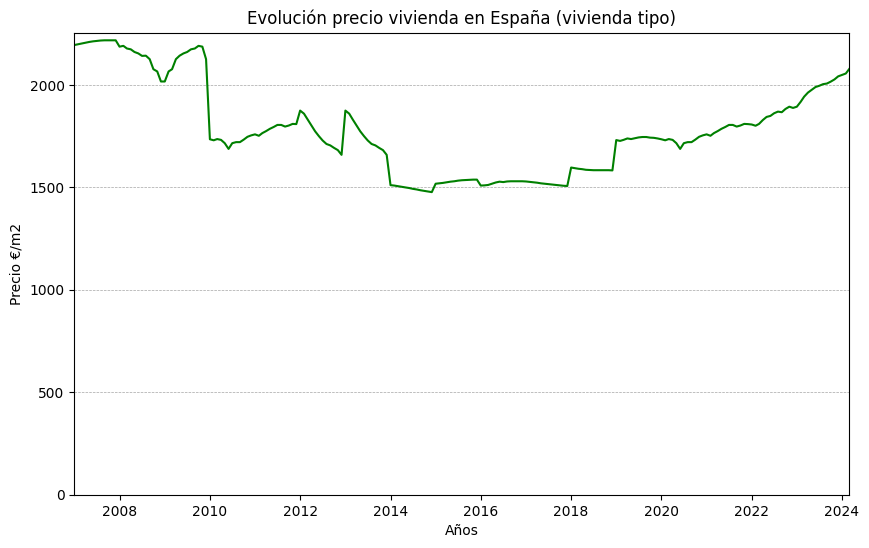

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(housing_price['Mes'], housing_price['Precio €/m2'], label='Precio', color='green')

plt.title('Evolución precio vivienda en España (vivienda tipo)')
plt.xlabel('Años')
plt.ylabel('Precio €/m2')
plt.ylabel('Precio €/m2')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Aplicar DateFormatter para mostrar solo el año en el eje X
date_formatter = mdates.DateFormatter('%Y')  # Para mostrar solo el año
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().autoscale(axis='x', tight=True)

# Guardar la figura con las configuraciones adecuadas
plt.savefig("2.1.Idealista.jpg", format='jpg', dpi=600, bbox_inches='tight')

# Mostrar el gráfico
plt.show()